In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv("currentData.csv")
data.columns

C:\Users\Mic\AppData\Local\Temp\ipykernel_8520\161218082.py:1: DtypeWarning: Columns (20,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("currentData.csv")


Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

C:\Users\Mic\AppData\Local\Temp\ipykernel_8520\1210644161.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TopTen.values, y=TopTen.index,palette="Paired")


Teacher, debt_consolidation             6716
Manager, debt_consolidation             5287
Teacher, credit_card                    2807
Registered Nurse, debt_consolidation    2766
RN, debt_consolidation                  2670
Name: count, dtype: int64

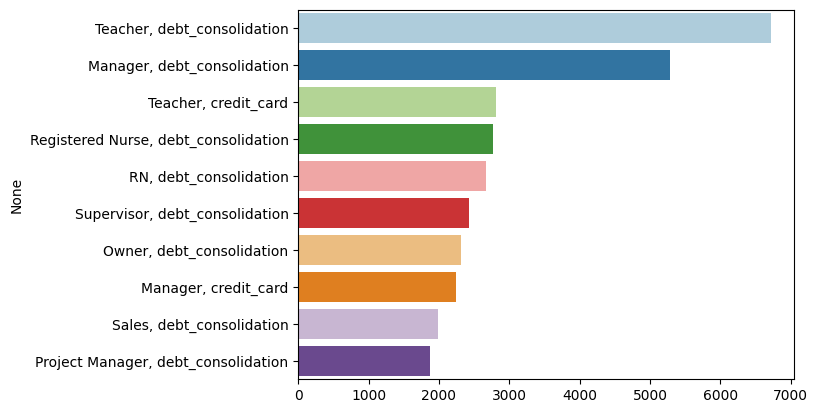

In [3]:
thisPeople = data[["emp_title", "purpose"]]
thisPeople

TopTen = thisPeople.value_counts().head(10)
TopTen.index = ["{0}, {1}".format(i[0], i[1]) for i in TopTen.index]


sns.barplot(x=TopTen.values, y=TopTen.index,palette="Paired")
TopTen.head()

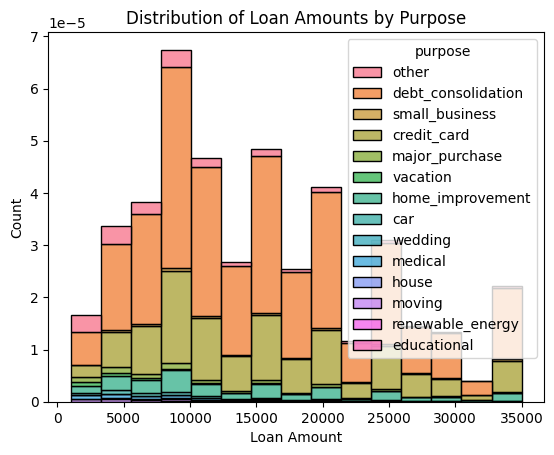

In [4]:
loanAmouts = data[["loan_amnt", "purpose"]]

sns.histplot(loanAmouts, x="loan_amnt", bins=15, hue="purpose", multiple="stack", stat='density')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts by Purpose')
plt.show()


<Axes: xlabel='int_rate', ylabel='Density'>

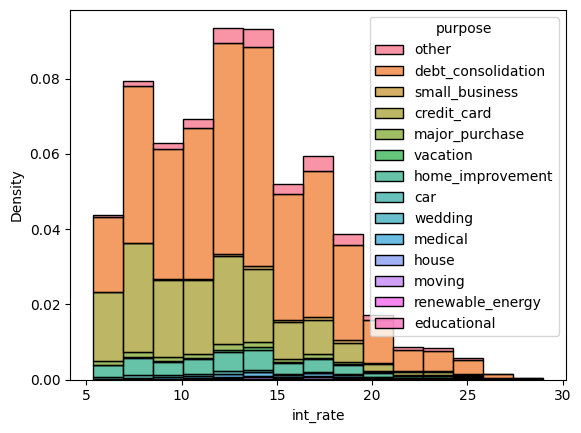

In [5]:
sns.histplot(data=data, x="int_rate", bins=15, hue="purpose", color= "tab10", multiple= "stack", stat="density")

In [6]:
filled = data.fillna(method="ffill")

le = LabelEncoder() 

for i in filled.columns:
    if filled[i].dtype == "object":
        filled[i] = le.fit_transform(data[i])


C:\Users\Mic\AppData\Local\Temp\ipykernel_8520\3618633322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled = data.fillna(method="ffill")


In [12]:
imputer = SimpleImputer(strategy='mean')
filled_imputed = imputer.fit_transform(filled)

# Optional: Reduce dimensionality if there are more than 2 columns in 'filled'
if filled.shape[1] > 2:
    pca = PCA(n_components=2)
    filled_reduced = pca.fit_transform(filled_imputed)
else:
    filled_reduced = filled_imputed

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=6)
clusters = dbscan.fit_predict(filled_reduced)


print(clusters)

[-1 -1 -1 ... -1 -1 -1]


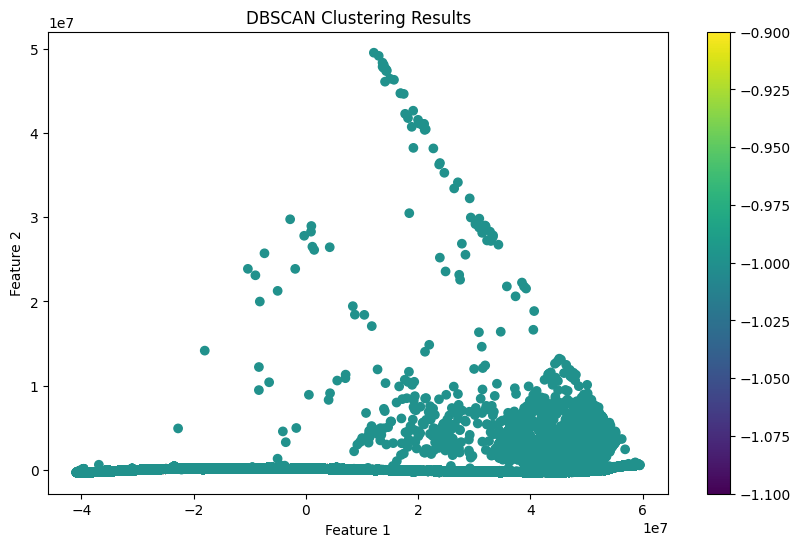

In [13]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filled_reduced[:, 0], filled_reduced[:, 1], c=clusters, cmap='viridis', label=np.unique(clusters))
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)
plt.show()